<a href="https://colab.research.google.com/github/vivek16pawar/World-Health-EDA/blob/main/World_Health_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and import datasets
- download data from kaggle
- import libraries
- create dataframe

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
download_url = 'https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete'

In [ ]:
import opendatasets as od
od.download(download_url)

Skipping, found downloaded files in "./who-worldhealth-statistics-2020-complete" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Alcohol Substance Abuse and Tobacco

In [ ]:
alch_df = pd.read_csv('/content/who-worldhealth-statistics-2020-complete/alcoholSubstanceAbuse.csv')
tobb_df = pd.read_csv('/content/who-worldhealth-statistics-2020-complete/tobaccoAge15.csv')
road_df = pd.read_csv('/content/who-worldhealth-statistics-2020-complete/roadTrafficDeaths.csv')

### Alcohol
- data is for age 15+

In [ ]:
alch_df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [ ]:
alch_df.tail()

,Location,Period,Indicator,Dim1,First Tooltip
2782,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Male,4.72
2783,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Female,0.99
2784,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Both sexes,2.46
2785,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Male,4.16
2786,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Female,0.88


In [ ]:
alch_df['Indicator'].unique()

array(['Total (recorded+unrecorded) alcohol per capita (15+) consumption'],
      dtype=object)

In [ ]:
alch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2787 non-null   object 
 1   Period         2787 non-null   int64  
 2   Indicator      2787 non-null   object 
 3   Dim1           2787 non-null   object 
 4   First Tooltip  2787 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.0+ KB


In [ ]:
alch_df.Period.value_counts()

2018    564
2015    564
2010    561
2005    549
2000    549
Name: Period, dtype: int64

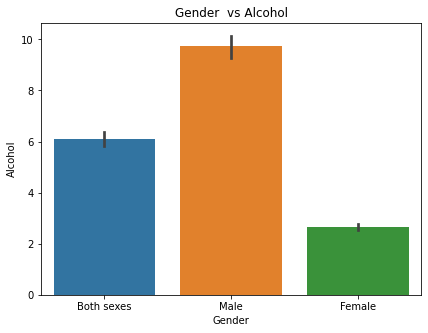

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.barplot(alch_df.Dim1,alch_df['First Tooltip'])
plt.title('Gender  vs Alcohol')
plt.xlabel('Gender')
plt.ylabel('Alcohol')
plt.show()

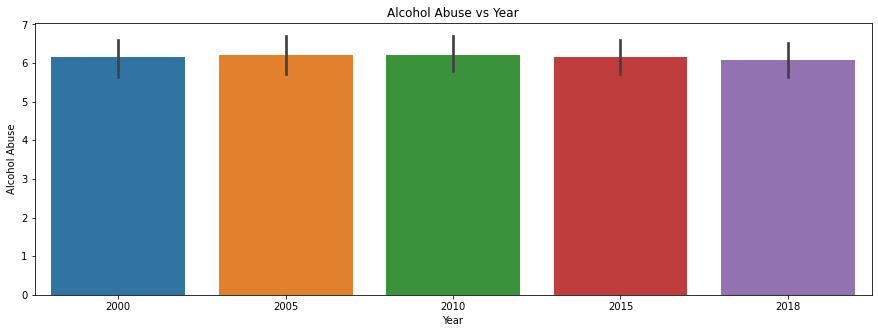

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(alch_df.Period,alch_df['First Tooltip'])
plt.title('Alcohol Abuse vs Year')
plt.xlabel('Year')
plt.ylabel('Alcohol Abuse')
plt.show()

In [ ]:
alch_country = alch_df.groupby('Location')['First Tooltip'].mean().sort_values(ascending = False).reset_index()
alch_country

,Location,First Tooltip
0,Lithuania,15.172000
1,Russian Federation,15.052667
2,Republic of Moldova,14.824667
3,Belarus,14.730000
4,Czechia,14.654000
...,...,...
183,Bangladesh,0.117200
184,Mauritania,0.097600
185,Somalia,0.074467
186,Libya,0.058067


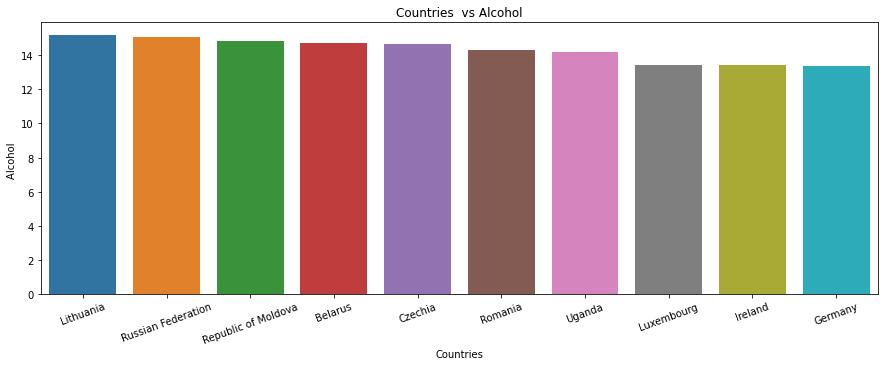

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(alch_country.Location[:10],alch_country['First Tooltip'])
plt.title('Countries  vs Alcohol')
plt.xlabel('Countries')
plt.ylabel('Alcohol ')
plt.xticks(rotation=20)
plt.show()

### Tobacco
- data is for tobacco smoking among persons aged 15 years and older

In [ ]:
tobb_df.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Albania,Age-standardized prevalence of current tobacco...,2018,Both sexes,29.2
1,Albania,Age-standardized prevalence of current tobacco...,2018,Male,50.5
2,Albania,Age-standardized prevalence of current tobacco...,2018,Female,7.9
3,Albania,Age-standardized prevalence of current tobacco...,2017,Both sexes,29.3
4,Albania,Age-standardized prevalence of current tobacco...,2017,Male,50.6


In [ ]:
tobb_df.tail()

,Location,Indicator,Period,Dim1,First Tooltip
4018,Zimbabwe,Age-standardized prevalence of current tobacco...,2005,Male,31.6
4019,Zimbabwe,Age-standardized prevalence of current tobacco...,2005,Female,2.3
4020,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Both sexes,18.3
4021,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Male,33.7
4022,Zimbabwe,Age-standardized prevalence of current tobacco...,2000,Female,2.9


In [ ]:
tobb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4023 non-null   object 
 1   Indicator      4023 non-null   object 
 2   Period         4023 non-null   int64  
 3   Dim1           4023 non-null   object 
 4   First Tooltip  4023 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [ ]:
tobb_df.describe()

,Period,First Tooltip
count,4023.000000,4023.000000
mean,2012.000000,24.807159
std,5.657557,15.745702
min,2000.000000,0.000000
25%,2010.000000,12.600000
50%,2014.000000,23.900000
75%,2016.000000,34.600000
max,2018.000000,91.000000


In [ ]:
tobb_df.Period.value_counts()

2018    447
2017    447
2016    447
2015    447
2014    447
2013    447
2010    447
2005    447
2000    447
Name: Period, dtype: int64

In [ ]:
tobb_df['Indicator'].unique()

array(['Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older'],
      dtype=object)

In [ ]:
alch_df.drop(['Indicator'], axis=1, inplace = True)
tobb_df.drop(['Indicator'], axis=1, inplace = True)

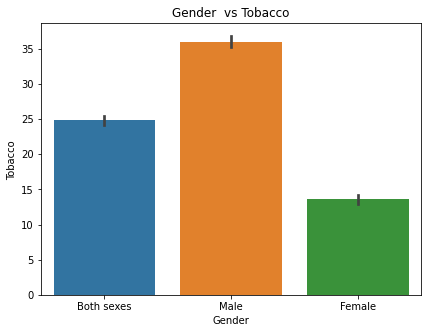

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(tobb_df.Dim1,tobb_df['First Tooltip'])
plt.title('Gender  vs Tobacco')
plt.xlabel('Gender')
plt.ylabel('Tobacco ')
plt.show()


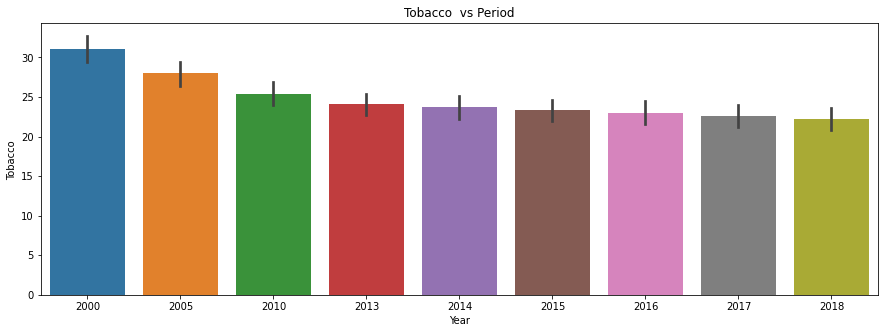

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(tobb_df.Period,tobb_df['First Tooltip'])
plt.title('Tobacco  vs Period')
plt.xlabel('Year')
plt.ylabel('Tobacco ')
plt.show()

In [ ]:
tobb_country = tobb_df.groupby('Location')['First Tooltip'].mean().sort_values(ascending = False).reset_index()
tobb_country

,Location,First Tooltip
0,Nauru,57.933333
1,Kiribati,56.948148
2,Tuvalu,52.996296
3,Myanmar,50.907407
4,Chile,47.381481
...,...,...
144,Niger,8.281481
145,Sao Tome and Principe,5.688889
146,Nigeria,5.514815
147,Ethiopia,5.285185


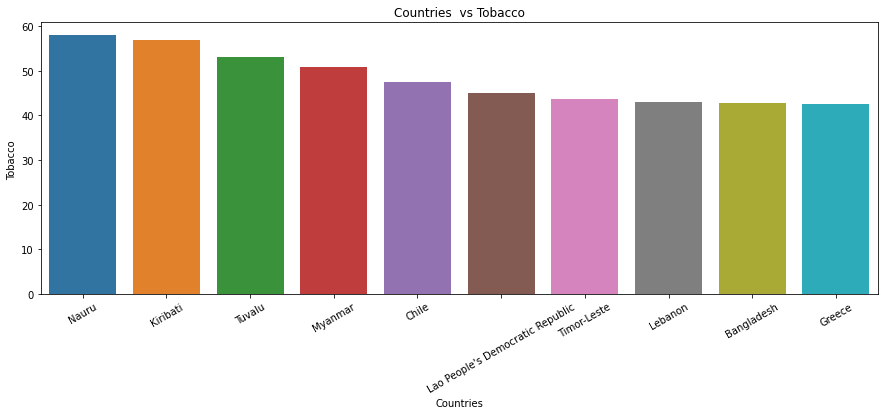

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(tobb_country.Location[:10],tobb_country['First Tooltip'])
plt.title('Countries  vs Tobacco')
plt.xlabel('Countries')
plt.ylabel('Tobacco ')
plt.xticks(rotation=30)
plt.show()

# Road Traffic Deaths

In [ ]:
road_df

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Estimated road traffic death rate (per 100 000...,2016,15.1
1,Albania,Estimated road traffic death rate (per 100 000...,2016,13.6
2,Angola,Estimated road traffic death rate (per 100 000...,2016,23.6
3,Antigua and Barbuda,Estimated road traffic death rate (per 100 000...,2016,7.9
4,Argentina,Estimated road traffic death rate (per 100 000...,2016,14.0
...,...,...,...,...
170,Uzbekistan,Estimated road traffic death rate (per 100 000...,2016,11.5
171,Vanuatu,Estimated road traffic death rate (per 100 000...,2016,15.9
172,Venezuela (Bolivarian Republic of),Estimated road traffic death rate (per 100 000...,2016,33.7
173,Viet Nam,Estimated road traffic death rate (per 100 000...,2016,26.4


In [ ]:
road_df.Period.unique()

array([2016])

Data of road accident is available for only 2016

In [ ]:
print(road_df['First Tooltip'].describe())

count    175.000000
mean      16.791429
std        9.288813
min        0.000000
25%        9.050000
50%       15.900000
75%       24.800000
max       35.900000
Name: First Tooltip, dtype: float64


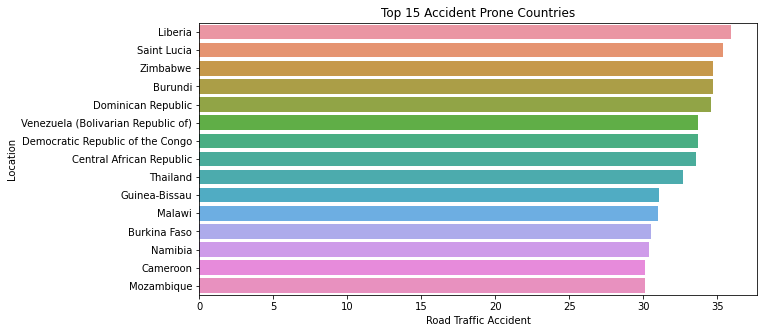

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="First Tooltip", y="Location", data=road_df.sort_values(by = 'First Tooltip', ascending = False)[:15])
plt.title('Top 15 Accident Prone Countries')
plt.xlabel('Road Traffic Accident')
plt.ylabel('Location')
plt.show()

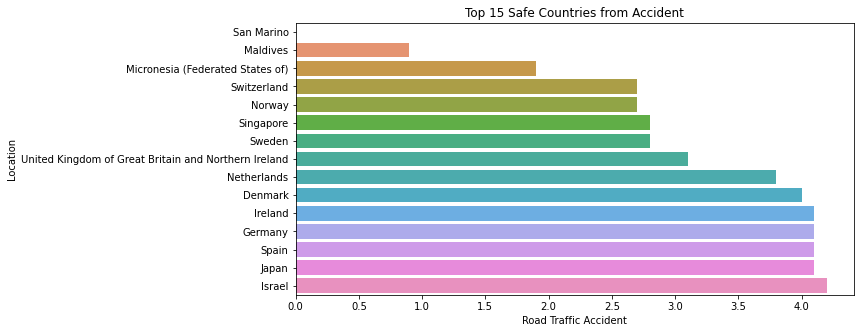

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="First Tooltip", y="Location", data=road_df.sort_values(by = 'First Tooltip')[:15])
plt.title('Top 15 Safe Countries from Accident')
plt.xlabel('Road Traffic Accident')
plt.ylabel('Location')
plt.show()

# Question and Answers

# Conclusion and Summery